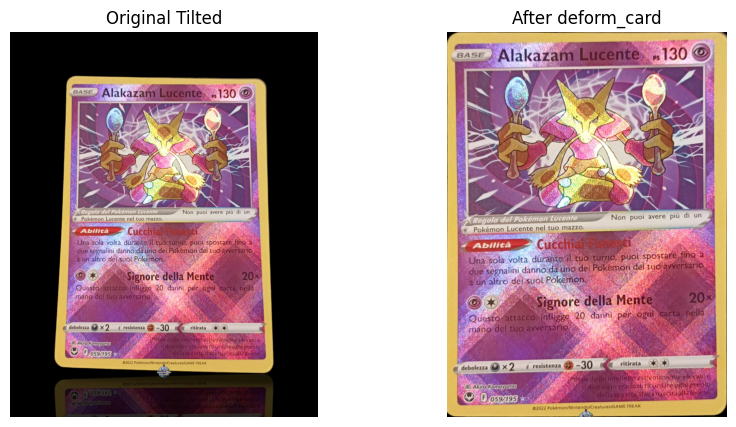

In [4]:
## checking whether the deformer works or not if we would have a

import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# 1) Pick any online image of a tilted Pokémon card
#    (replace this URL with any card-photo you find)
angled_url = "https://themandrakemonstore.com/cdn/shop/files/PhotoRoom-20230716_151208.jpg?v=1689515222"

# 2) Download & open it
resp = requests.get(angled_url, stream=True)
angled = Image.open(BytesIO(resp.content)).convert("RGB")

# 3) Dewarp it
from model.deformer import deform_card
flat_np = deform_card(angled)   # numpy array H×W×3

# 4) Plot side-by-side
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(angled); axes[0].set_title("Original Tilted"); axes[0].axis('off')
axes[1].imshow(flat_np); axes[1].set_title("After deform_card"); axes[1].axis('off')
plt.show()


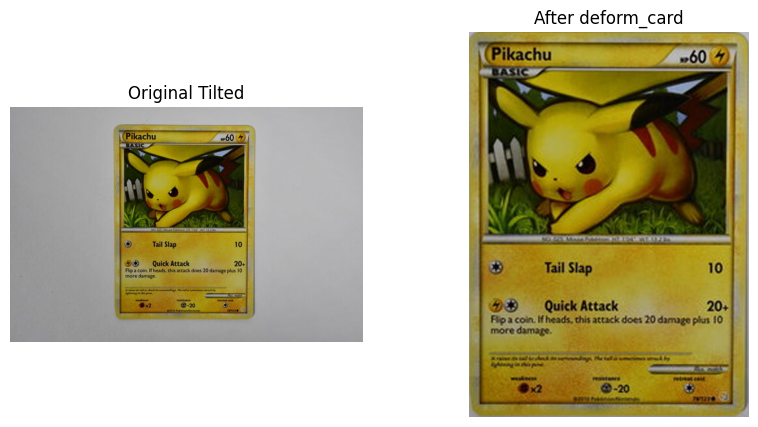

In [2]:
## checking whether the deformer works or not if we would have a

import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# 1) Pick any online image of a tilted Pokémon card
#    (replace this URL with any card-photo you find)
angled_url = "https://t3.ftcdn.net/jpg/05/72/79/70/360_F_572797039_QlBnsECT0RMGHJZIpXMor984Y7OhdwJ2.jpg"

# 2) Download & open it
resp = requests.get(angled_url, stream=True)
angled = Image.open(BytesIO(resp.content)).convert("RGB")

# 3) Dewarp it
from model.deformer import deform_card
flat_np = deform_card(angled)   # numpy array H×W×3

# 4) Plot side-by-side
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(angled); axes[0].set_title("Original Tilted"); axes[0].axis('off')
axes[1].imshow(flat_np); axes[1].set_title("After deform_card"); axes[1].axis('off')
plt.show()


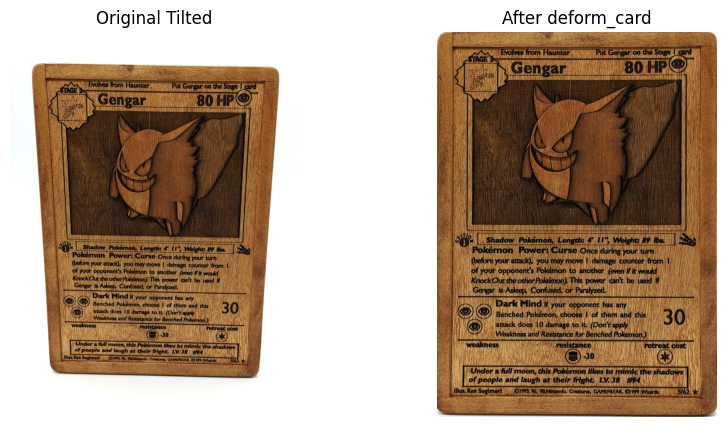

In [3]:
## checking whether the deformer works or not if we would have a

import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# 1) Pick any online image of a tilted Pokémon card
#    (replace this URL with any card-photo you find)
angled_url = "https://gtgames.ca/cdn/shop/files/gengar_2_2_800x.jpg?v=1702488949"

# 2) Download & open it
resp = requests.get(angled_url, stream=True)
angled = Image.open(BytesIO(resp.content)).convert("RGB")

# 3) Dewarp it
from model.deformer import deform_card
flat_np = deform_card(angled)   # numpy array H×W×3

# 4) Plot side-by-side
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(angled); axes[0].set_title("Original Tilted"); axes[0].axis('off')
axes[1].imshow(flat_np); axes[1].set_title("After deform_card"); axes[1].axis('off')
plt.show()

# CNN training

In [ ]:
# Cell 4: Train the bottom‐corner CNN
import os
import matplotlib.pyplot as plt
from model.modelling import symbols_model

# 1) Where your reduced & augmented data lives
DATA_JSON = "/path/to/dict_reduceddataset_augmented.json"  # ← replace!

# 2) Train!
model, history, conf_matrix, label_encoder = symbols_model(DATA_JSON)

# 3) Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss"); plt.xlabel("Epoch"); plt.legend()
plt.show()

# 4) Show confusion matrix
import seaborn as sns
import numpy as np
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Blues")
plt.ylabel("True"); plt.xlabel("Pred"); plt.title("Test Confusion Matrix")
plt.show()
